# 5 days of Data cleaning challenge.



## Day 2 : Scale and Normalize Data
Here's what we're going to do today:

* [Get our environment set up](#1)
* [Scaling vs. Normalization: What's the difference?](#2)
* [Practice scaling](#3)
* [Practice normalization](#4)

Let's get started!

## For data click [Here](https://www.kaggle.com/kemical/kickstarter-projects)

## Get our environment setup<a id='1'></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # for box-cox tracnsformantion
from mlxtend.preprocessing import minmax_scaling # for minmax scaling
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0) # for reproducibility

In [2]:
df = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')

## Scaling vs. Normalization : What is the difference?<a id='2'></a>

One of the reasons that it's easy to get confuse between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you are changing the range of your data while in normalization you are change the shape of the distribution of your data. Let's talk a little more in-depth about each of these options.

## Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale the data when you are using methods based on measures of how far apart data points, like SVM or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)

Text(0.5, 1.0, 'Scaled data')

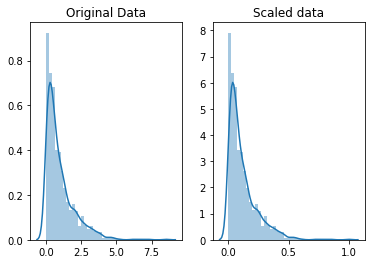

In [3]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# min-max scale the data between 0-1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled data")

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 7, it now ranges from 0 to 1.

## Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

Text(0.5, 1.0, 'Normalized data')

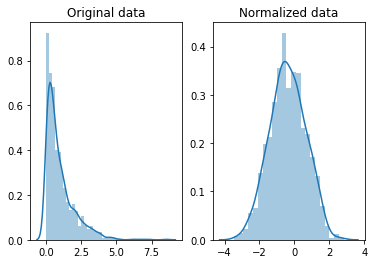

In [4]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, ax = ax[0])
ax[0].set_title("Original data")
sns.distplot(normalized_data[0], ax = ax[1])
ax[1].set_title("Normalized data")

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the bell. 

## Practice scaling<a id='3'></a>
To practice scaling and normalization, we're going to be using a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

Text(0.5, 1.0, 'Scaled data')

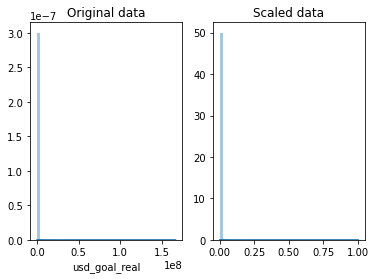

In [5]:
# select the usd_goal_real column
usd_goal = df.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original and scaled data to compare
fig, ax = plt.subplots(1,2)
sns.distplot(df.usd_goal_real, ax = ax[0])
ax[0].set_title("Original data")
sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled data")

You can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)

In [6]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

Text(0.5, 1.0, 'Scaled data')

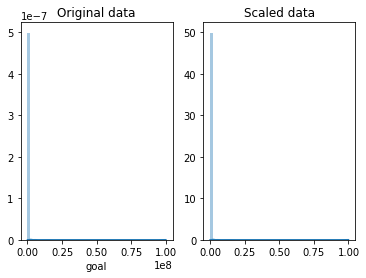

In [7]:
# select the goal column
goal = df.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(goal, columns = [0])

# plot the original and scaled data to compare
fig, ax = plt.subplots(1,2)
sns.distplot(df.goal, ax = ax[0])
ax[0].set_title("Original data")
sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled data")

## Practice Normalization<a id='4'></a>
Ok, now let's try practicing normalization. We're going to normalize the amount of money pledged to each campaign.

Text(0.5, 1.0, 'Normalized data')

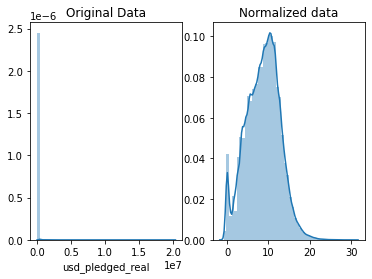

In [8]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = df.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = df.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to normal!

Text(0.5, 1.0, 'Normalized data')

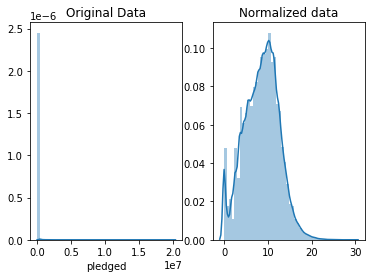

In [9]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = df.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = df.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")